In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os

base_dir = '/content/drive/My Drive/Colab Notebooks/simpsons'

convnet_version_dir = os.path.join(base_dir, 'teste')
  
original_train_dir = os.path.join(base_dir, 'train_set')

train_dir = os.path.join(convnet_version_dir, 'train_set')
validation_dir = os.path.join(convnet_version_dir, 'validation_set')
test_dir = os.path.join(convnet_version_dir, 'test_set')

train_set_file = os.path.join(convnet_version_dir, 'train_set.txt')
validation_set_file = os.path.join(convnet_version_dir, 'validation_set.txt')
test_set_file = os.path.join(convnet_version_dir, 'test_set.txt')

model_file = os.path.join(convnet_version_dir, 'weights-{epoch:02d}-{val_acc:.2f}-vrs02.hdf5')

## Introdução


*Falar sobre o trabalho, porque escolhemos CNN, o que aprendemos na aula, etc etc*

## Problema Inicial

Na falta de uma ideia melhor, optamos por pegar um dataset introdutório do Kaggle. Escolhemos o dataset dos Simpsons.

É um dataset com 20933 imagens separadas em 47 classes. Disponível neste [link](https://www.kaggle.com/alexattia/the-simpsons-characters-dataset/downloads/the-simpsons-characters-dataset.zip/4).

Percebemos porém que o dataset possui diversos problemas:
- Imagens borradas
- Imagens sem definição
- Imagens cortadas
- Imagens com diversos tamanhos
- Personagem não centralizado
- Classes com pouquissimas imagens (21 classes com menos de 100 imagens cada)
- Imagens com mais de um pesonagem

Diante disso, percebemos a impossibilidade de usar o dataset em sua forma original. Por isso, criamos nossa própria versão, que é um pouco mais reduzida. 


## Preparação da base

Optamos por remover todas as classes com menos de 450 imagens, ficando assim com 17 classes. Ainda removemos algumas imagens que presumimos mais atrapalhar do que ajudar no treinamento.   

Na sequencia separamos,de forma aleatória, as imagens de cada classe em 3 grupos: 
- **validação**: 150 imagens
- **teste**: 150 imagens
- **treino**: todo o resto *(de 150 a 1950)*

In [0]:
from IPython.display import HTML, display
def progress(value, max=100, name=''):
    return HTML("""
        <b>{name}</b> 
        <progress
            value='{value}'
            max='{max}',
            style='width: 50%'
        >
            {value}
        </progress>
    """.format(name=name, value=value, max=max))

In [0]:
import numpy as np
import shutil

if os.path.os.path.exists(test_dir) or os.path.os.path.exists(train_dir) or os.path.os.path.exists(validation_dir):
  raise SystemError('As bases já estão separadas !!!')

for character in os.listdir(original_train_dir):
  print(character)
  out = display(progress(0, 100), display_id=True)
  
  files_total = os.listdir(os.path.join(original_train_dir, character))
  files_removed = np.random.choice(files_total, 300, replace=False)
  files_test = np.random.choice(files_removed, 150, replace=False)
  
  i = 0
  for f in files_test:
    if not os.path.exists(os.path.join(test_dir, character)):
      os.makedirs(os.path.join(test_dir, character)) 
    src_file = os.path.join(original_train_dir, character, f)
    dst_file = os.path.join(test_dir, character, f)
    shutil.copyfile(src_file, dst_file)
    i+=1
    out.update(progress(i, len(files_test), 'test'))
  
  i = 0
  for f in files_removed:
    if f not in files_test:
      if not os.path.exists(os.path.join(validation_dir, character)):
        os.makedirs(os.path.join(validation_dir, character)) 
      src_file = os.path.join(original_train_dir, character, f)
      dst_file = os.path.join(validation_dir, character, f)
      shutil.copyfile(src_file, dst_file)
      i+=1
      out.update(progress(i, len(files_removed)-len(files_test), 'validation'))
  
  i = 0  
  for f in files_total:
    if f not in files_removed:
      if not os.path.exists(os.path.join(train_dir, character)):
        os.makedirs(os.path.join(train_dir, character))       
      src_file = os.path.join(original_train_dir, character, f)
      dst_file = os.path.join(train_dir, character, f)
      shutil.copyfile(src_file, dst_file)
      i+=1
      out.update(progress(i, len(files_total)-len(files_removed), 'train'))  

### Restaurar a base

Visto que o processo de separação de imagens é 100% aleatório, ele pode variar a cada execução. Para o caso de ser necessário restaurar algum cenário, deixamos um log com as imagens usadas em cada base. 

In [0]:
bases = [
    { 'path' : test_dir, 'file': test_set_file},
    { 'path' : validation_dir, 'file': validation_set_file},
    { 'path' : train_dir, 'file': train_set_file}
]

for base in bases:
  resumo = []
  for character in os.listdir(base['path']):
    for pic in os.listdir(os.path.join(base['path'],character)):
      resumo.append(os.path.join(character, pic))
  resumo.sort()
  with open(base['file'], 'w') as f:
    f.write("\n".join(resumo)) 

## Arquitetura da rede

*Descrever arquitetura final!*

No final deste documento é possível avaliar outras arquiteturas usadas e seus resultados.



In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(17, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [0]:
from keras import optimizers

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 13534 images belonging to 17 classes.


In [0]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 2550 images belonging to 17 classes.


In [0]:
test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 2550 images belonging to 17 classes.


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True)

result = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n//validation_generator.batch_size,
                    epochs=15, 
                    callbacks = [checkpoint]
)

In [0]:
model.load_weights(model_file)

In [0]:
test_generator.reset()
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
predicted_class_indices=np.argmax(Y_pred,axis=1)

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

In [0]:
predictions = [labels[k] for k in predicted_class_indices]

Matriz de Confusão


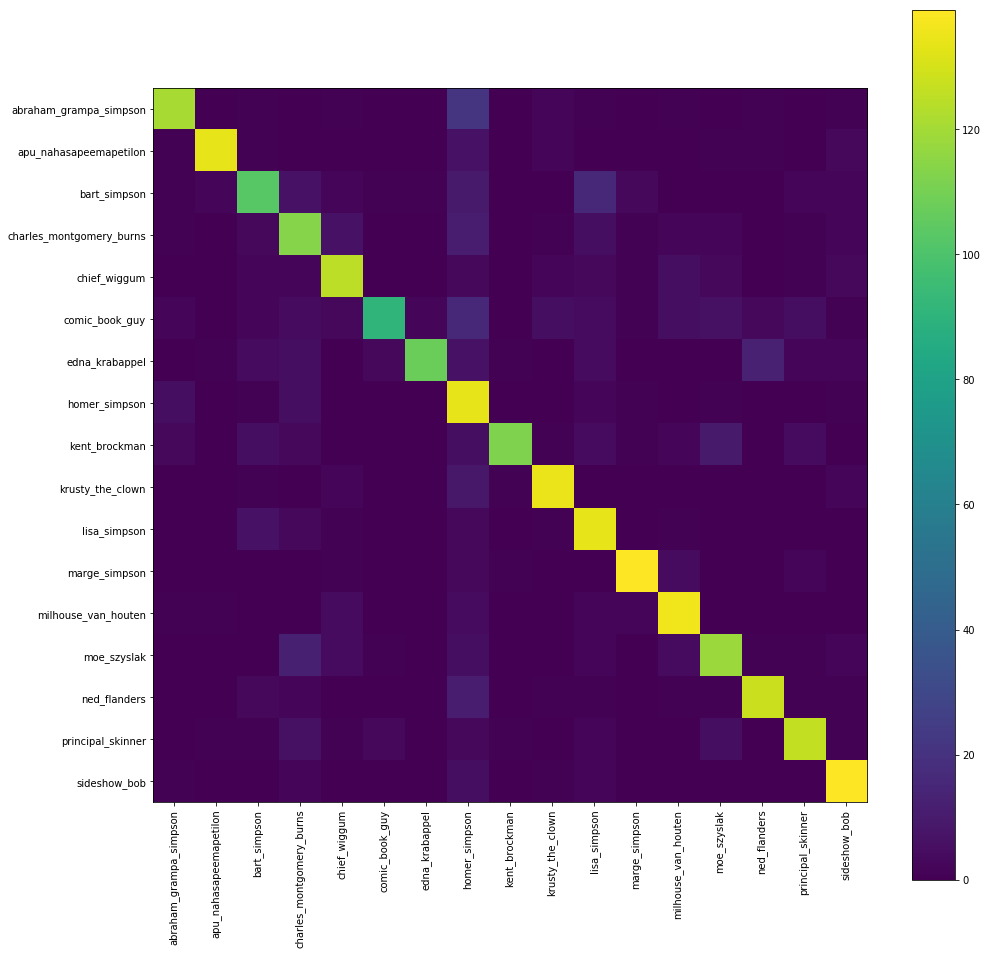

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

print('Matriz de Confusão')
plt.figure(figsize=(16,16))
cnf_matrix = confusion_matrix(test_generator.classes, y_pred)
classes = list(labels.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [0]:
print('Relatório de Classificação')
print(classification_report(test_generator.classes, y_pred, target_names=classes))

Relatório de Classificação
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.89      0.81      0.85       150
  apu_nahasapeemapetilon       0.96      0.89      0.93       150
            bart_simpson       0.77      0.69      0.73       150
charles_montgomery_burns       0.69      0.76      0.72       150
            chief_wiggum       0.83      0.83      0.83       150
          comic_book_guy       0.92      0.61      0.73       150
          edna_krabappel       0.97      0.72      0.83       150
           homer_simpson       0.52      0.89      0.66       150
           kent_brockman       0.97      0.75      0.84       150
        krusty_the_clown       0.89      0.90      0.90       150
            lisa_simpson       0.74      0.89      0.81       150
           marge_simpson       0.93      0.93      0.93       150
     milhouse_van_houten       0.84      0.91      0.87       150
             moe_szyslak       0.80      0.79   

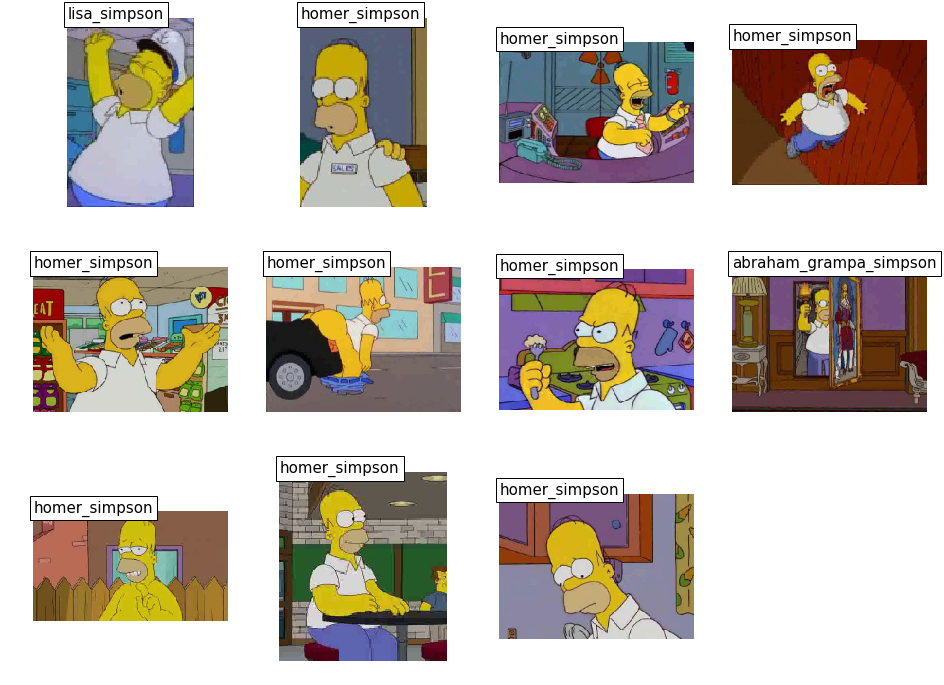

In [0]:
import numpy as np
from google.colab import files, output
from keras.preprocessing import image


import matplotlib.pyplot as plt
import matplotlib.image as mpimg



uploaded = files.upload()
output.clear()


fig = plt.gcf()
fig.set_size_inches(16,16)

for ix, fn in enumerate(uploaded.keys()):
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  result = model.predict(images, batch_size=10)
  
  name = 'desconhecido'
  for (i, v) in enumerate(result[0]):
    if v == 1:
      name = labels[i]
      break;
  
  sp = plt.subplot(4, 4, ix + 1)
  sp.text(0,0, name, fontsize=15, bbox={'facecolor': 'white'})
  sp.axis('Off') 
  img = mpimg.imread(fn)
  plt.imshow(img)
      
plt.show()  